# Playstore_App_Rating_Prediction

## Importing the Required Libraries 

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.offline as pyo
from plotly.offline import iplot,plot,init_notebook_mode
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import seaborn as sns
plt.rc('figure', figsize=(20.0, 10.0))

In [116]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [117]:
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing Dataset

In [118]:
dataset=pd.read_csv("googleplaystore.csv")

In [119]:
dataset.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Finding and Handling any Missing Data

Analysing various columns for any null values

In [120]:
dataset.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Dropping the rows which have any null records

In [121]:
dataset=dataset.dropna()
dataset=dataset.reset_index(drop=True)

Checking for any null records

In [122]:
dataset.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Data Preparation

Analysing various data types of different rows in dataset

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9360 non-null   float64
 1   App             9360 non-null   object 
 2   Category        9360 non-null   object 
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 950.8+ KB


Converting the Reviews column into integers

In [124]:
dataset['Reviews']=dataset["Reviews"].astype(int)

Converting the size variable into a single type by removing 'M', 'k' and the string "varies with device" present in it

In [125]:
dataset["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

This function will check whether the value have 'M' or 'k' and according to it will change the value.

In [126]:
def mb_to_kb(a):
  if a.endswith("M"):
    return float(a[:-1])*1000
  elif a.endswith("k"):
    return float(a[:-1])
  else:
    return a

In [127]:
dataset["Size"]=dataset["Size"].apply(lambda x:mb_to_kb(x))

In [128]:
dataset[dataset["Size"]=="Varies with device"]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
35,4.1,Floor Plan Creator,ART_AND_DESIGN,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
40,4.4,Textgram - write on photos,ART_AND_DESIGN,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
50,4.6,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
65,4.3,Ulysse Speedometer,AUTO_AND_VEHICLES,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
66,3.9,REPUVE,AUTO_AND_VEHICLES,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,4.4,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
9279,3.6,Posta App,MAPS_AND_NAVIGATION,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
9307,3.4,Chat For Strangers - Video Chat,SOCIAL,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device
9348,4.0,Frim: get new friends on local chat rooms,SOCIAL,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,23-Mar-18,Varies with device,Varies with device


In [129]:
rows=dataset[dataset["Size"]=="Varies with device"].index

In [130]:
dataset.drop(rows,inplace=True)

Removing the '+' symbol from each value in Installs column

In [131]:
dataset["Installs"].value_counts()

1,000,000+        1301
100,000+          1037
10,000+            968
10,000,000+        825
1,000+             689
5,000,000+         535
500,000+           490
50,000+            436
5,000+             419
100+               303
100,000,000+       201
500+               197
50,000,000+        147
10+                 67
50+                 56
500,000,000+        30
1,000,000,000+      10
5+                   9
1+                   3
Name: Installs, dtype: int64

In [132]:
dataset["Installs"]=dataset["Installs"].str[:-1]
dataset["Installs"]=dataset["Installs"].apply(lambda x:x.replace(",",""))

In [133]:
dataset["Installs"]=dataset["Installs"].astype(int)

Removing the '$' sign from the Price Column

In [134]:
dataset["Price"].unique()

array(['0', '$4.99 ', '$6.99 ', '$7.99 ', '$3.99 ', '$5.99 ', '$2.99 ',
       '$1.99 ', '$9.99 ', '$0.99 ', '$9.00 ', '$5.49 ', '$10.00 ',
       '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ', '$14.99 ', '$29.99 ',
       '$12.99 ', '$3.49 ', '$10.99 ', '$7.49 ', '$1.50 ', '$19.99 ',
       '$15.99 ', '$33.99 ', '$39.99 ', '$2.49 ', '$4.49 ', '$1.70 ',
       '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$1.59 ', '$6.49 ',
       '$1.29 ', '$299.99 ', '$379.99 ', '$37.99 ', '$18.99 ', '$389.99 ',
       '$8.49 ', '$1.75 ', '$14.00 ', '$2.00 ', '$3.08 ', '$2.59 ',
       '$19.40 ', '$15.46 ', '$8.99 ', '$3.04 ', '$13.99 ', '$4.29 ',
       '$3.28 ', '$4.60 ', '$1.00 ', '$2.90 ', '$1.97 ', '$2.56 ',
       '$1.20 '], dtype=object)

In [135]:
dataset["Price"]=dataset["Price"].apply(lambda x:x.replace("$",""))
dataset["Price"]=dataset["Price"].astype(float)

Removing the rows with more nummber of rating than installs

In [136]:
dataset["Rating"].between(0,5).sum()

7723

In [137]:
rows=dataset[dataset["Installs"]<dataset["Reviews"]].index
dataset.drop(rows,inplace=True)

## Univariate Analysis

In [138]:
dataset.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Outline Correction

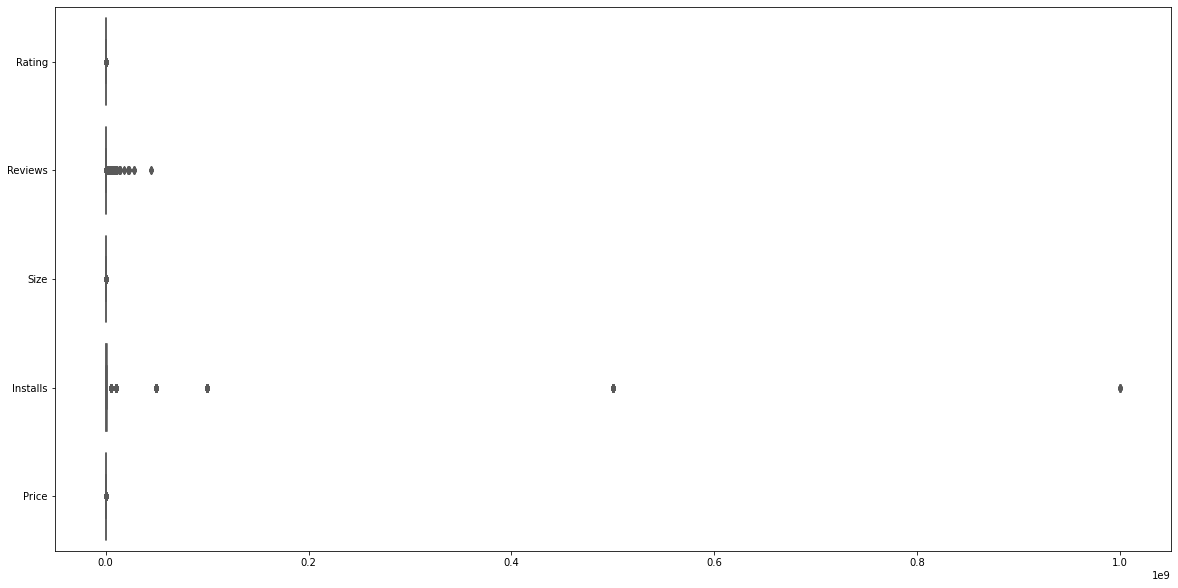

In [139]:
sns.boxplot(data=dataset,orient="h",palette="Set2")

It is evident from the box plot that there are some outliners in Reviews, Installs and Price columns

In [140]:
dataset["Reviews"].value_counts()

2          80
3          77
5          74
4          71
1          66
           ..
3063        1
33782       1
1010        1
77717       1
1385093     1
Name: Reviews, Length: 4669, dtype: int64

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Thus Removing the applications having reviews more than 2 million

In [141]:
rows=dataset[dataset["Reviews"]>2000000].index

In [142]:
dataset.drop(rows,inplace=True)

From the box plot, it seems like there are some apps with very high price. A price of 200 for an application on the Play Store is very high and suspicious!. Hence removing the applications with price more than 200$

In [143]:
rows=dataset[dataset["Price"]>200].index

In [144]:
dataset.drop(rows,inplace=True)

There seems to be some outliers in installs field too. Hence setting the threshold at 500000.

In [145]:
perc=[.10, .25, .50, .70, .90, .95, .99]
dataset["Installs"].describe(percentiles=perc)

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      1.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      5.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

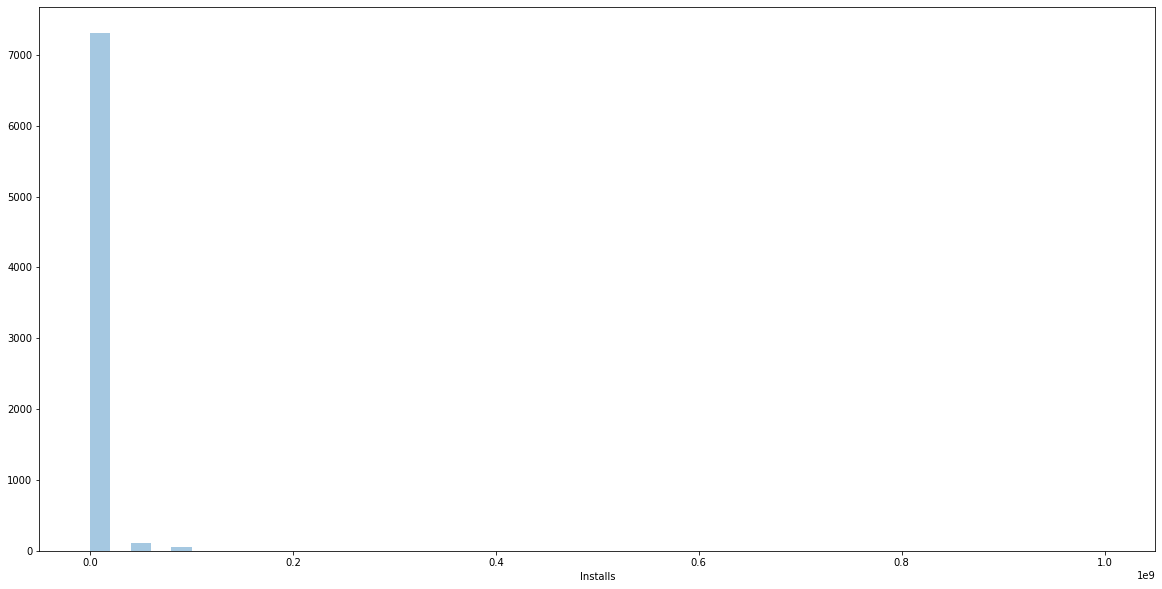

In [146]:
sns.distplot(dataset["Installs"],kde=False)

In [147]:
rows=dataset[dataset["Price"]>500000].index

In [148]:
dataset.drop(rows,inplace=True)

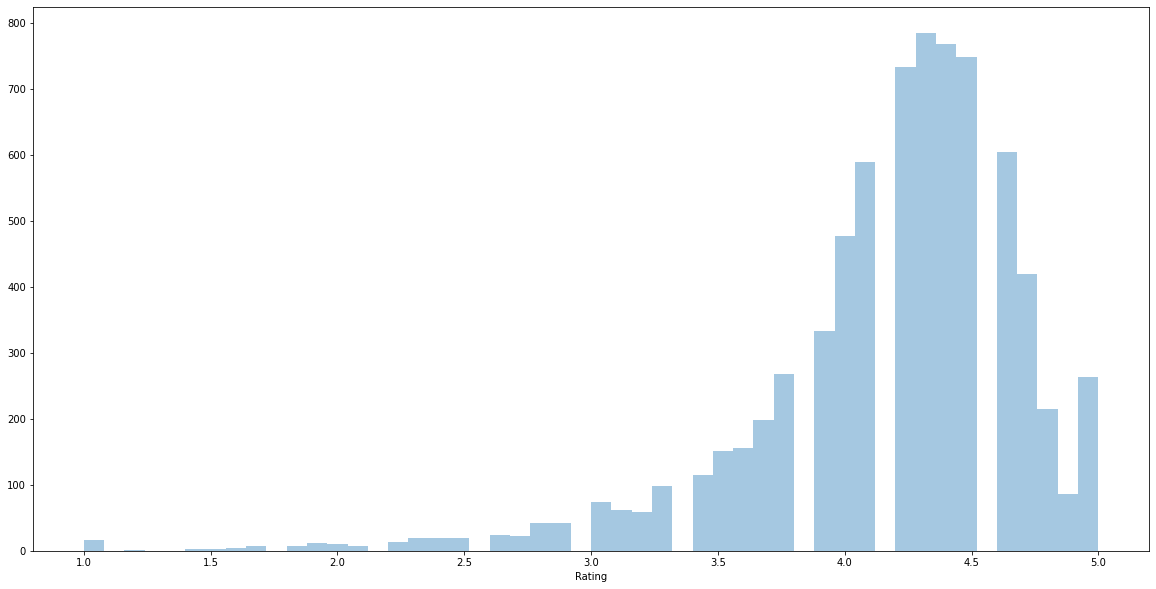

In [149]:
sns.distplot(dataset["Rating"],kde=False)

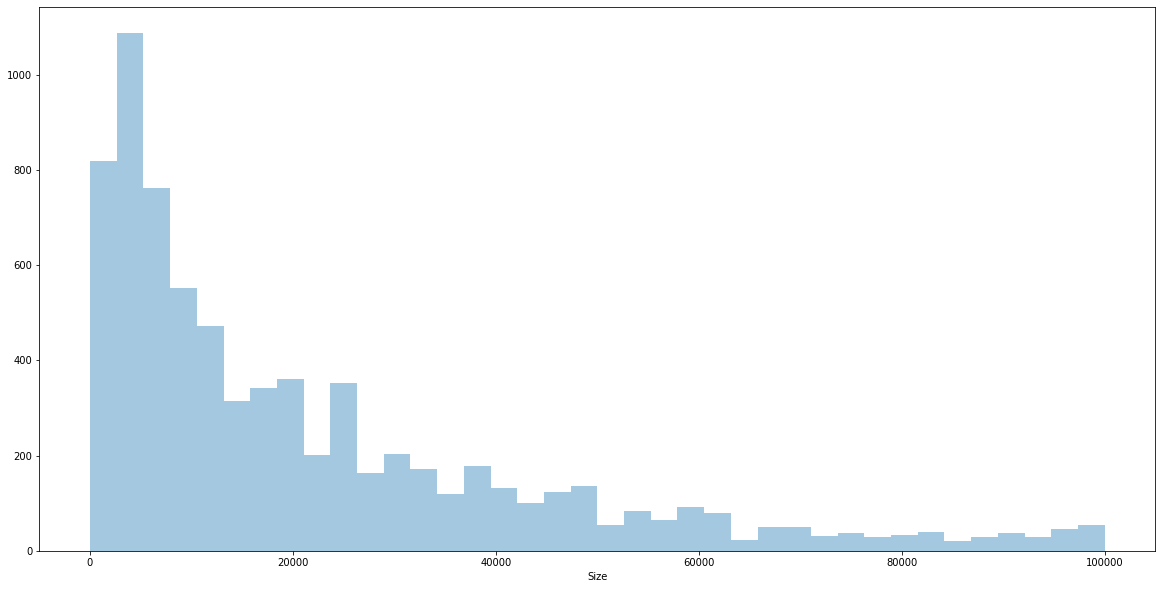

In [150]:
sns.distplot(dataset["Size"],kde=False)

From above both histograms it is clear that both of them dont have any significant outliners.

## Multivariate Analysis

In [151]:
dataset

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,4.8,Chemin (fr),BOOKS_AND_REFERENCE,44,619,1000,Free,0.0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
9355,4.0,FR Calculator,FAMILY,7,2600,500,Free,0.0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
9356,4.5,Sya9a Maroc - FR,FAMILY,38,53000,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
9357,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600,100,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up


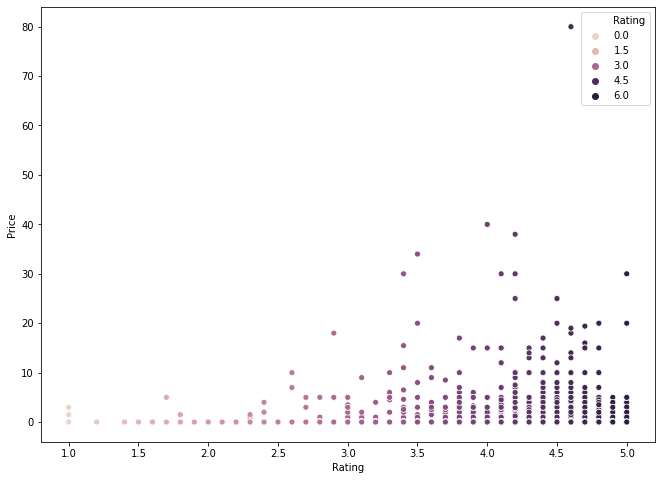

In [152]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=dataset["Rating"],y=dataset["Price"],hue=dataset["Rating"])

Well there is no clear pattern that paid apps get better ratings but apps with minimum price of 9$ gets atleast average rating of 2.5

In [153]:
px.scatter(dataset,x="Rating",y="Size",color="Size",color_continuous_scale=px.colors.sequential.Viridis)

This scatterplot also shows that increase in size does not ensure high rating but heavy apps are mostly rated better as compared to lighter apps.

In [154]:
px.scatter(dataset,x="Rating",y="Reviews",color="Size",color_continuous_scale=px.colors.sequential.Viridis)

There is no particular patter that is followed between reviews and rating but we can see that after some point rating becomes independent of popularity.

In [155]:
px.box(dataset,y="Rating",x="Content Rating")

Adukt apps have the highest rating

In [156]:
px.box(dataset,y="Rating",x="Category")

## Data Preprocessing

In [157]:
dataset.columns

Index(['Rating', 'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Reseting the rows' index

In [158]:
dataset=dataset.reset_index(drop=True)

Droping all teh unnecessary columns from the dataset

In [159]:
dataset.drop(["App","Installs","Type","Content Rating",'Last Updated', 'Current Ver',
       'Android Ver'],axis=1,inplace=True)

In [160]:
dataset

,Rating,Category,Reviews,Size,Price,Genres
0,4.1,ART_AND_DESIGN,159,19000,0.0,Art & Design
1,3.9,ART_AND_DESIGN,967,14000,0.0,Art & Design;Pretend Play
2,4.7,ART_AND_DESIGN,87510,8700,0.0,Art & Design
3,4.5,ART_AND_DESIGN,215644,25000,0.0,Art & Design
4,4.3,ART_AND_DESIGN,967,2800,0.0,Art & Design;Creativity
...,...,...,...,...,...,...
7478,4.8,BOOKS_AND_REFERENCE,44,619,0.0,Books & Reference
7479,4.0,FAMILY,7,2600,0.0,Education
7480,4.5,FAMILY,38,53000,0.0,Education
7481,5.0,FAMILY,4,3600,0.0,Education


Seprating the independent and dependent variable

In [161]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [162]:
X

array([['ART_AND_DESIGN', 159, 19000.0, 0.0, 'Art & Design'],
       ['ART_AND_DESIGN', 967, 14000.0, 0.0, 'Art & Design;Pretend Play'],
       ['ART_AND_DESIGN', 87510, 8700.0, 0.0, 'Art & Design'],
       ...,
       ['FAMILY', 38, 53000.0, 0.0, 'Education'],
       ['FAMILY', 4, 3600.0, 0.0, 'Education'],
       ['LIFESTYLE', 398307, 19000.0, 0.0, 'Lifestyle']], dtype=object)

One Hot Encoder for converting the categorical data present in both the "Category" and "Genre" column

In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [164]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [-4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Spliting the dataset into training and testing dataset

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Model Training


Finding the Best algorithmn for the dataset

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
models=[["Linear Regression : ",LinearRegression()],
        ["Random Forest Regresssor : ",RandomForestRegressor()],
        ["Decision Tree Regressor : ",DecisionTreeRegressor()],
        ["K Nearest Neighbour : ",KNeighborsRegressor()],
        ["XG Boost : ",XGBRegressor()]
        ]

for name,model in models:
  regressor=model
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(name, np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Regression :  0.5410990449503684
Random Forest Regresssor :  0.5270924477614524
Decision Tree Regressor :  0.7722268677903802
K Nearest Neighbour :  0.5730794360995344
[18:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost :  0.5249012373902358


From the above result XGR boost seemed to be the best algorithm for this database

In [167]:
from xgboost import XGBRegressor
regressor=XGBRegressor()
model=regressor.fit(X_train, y_train)

[18:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Predicting the Test result

In [168]:
y_pred=model.predict(X_test)

Finding various metrics for evaluating the regression model from sklearn library

In [169]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2_Score=',r2_score(y_test,y_pred))
print('Root_Mean_Squared_Error(RMSE)=',np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score= 0.09268502433447723
Root_Mean_Squared_Error(RMSE)= 0.5249012373902358


In [170]:

a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()});a.head(10)

,Actual,Predicted
0,4.4,4.295502
1,4.5,4.240069
2,5.0,4.056809
3,4.5,4.324114
4,4.6,4.226015
5,4.4,4.263394
6,4.1,4.279711
7,5.0,4.110910
8,3.6,4.147019
9,4.3,4.289383


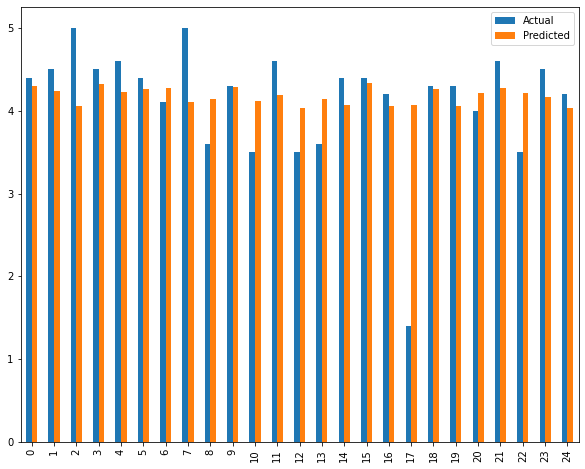

In [171]:
fig=a.head(25)
fig.plot(kind='bar',figsize=(10,8))